In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
gold_data=pd.read_csv("gld_price_data.csv")
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [39]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [40]:
gold_data.isna().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [41]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [42]:
gold_data.shape

(2290, 6)

In [43]:
correlation=gold_data.drop('Date',axis=1).corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


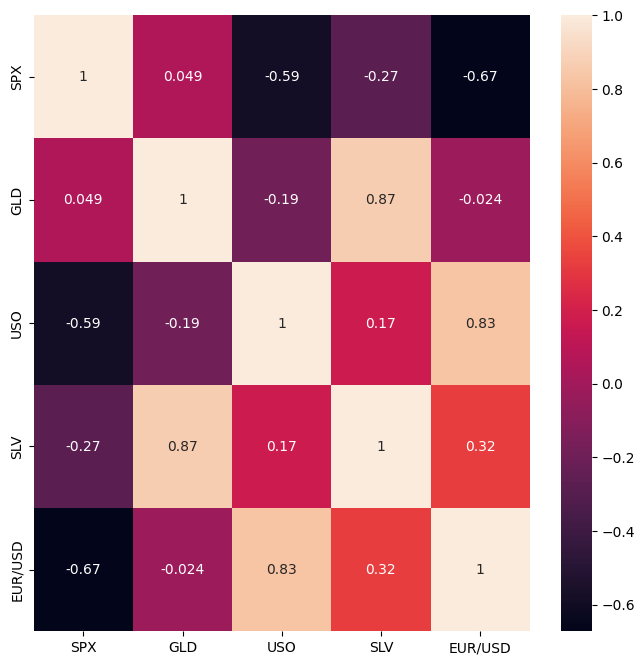

In [44]:
# heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation,annot=True)
plt.show()

In [53]:
# features
X=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']
print("X",X.shape)
print("y",y.shape)

X (2290, 4)
y (2290,)


In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Training data:",X_train.shape,y_train.shape)
print("Testing data:",X_test.shape,y_test.shape)

Training data: (1832, 4) (1832,)
Testing data: (458, 4) (458,)


In [47]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [48]:
predict=model.predict(X_test)

In [49]:
r2=r2_score(y_test,predict)
print("R2 score:",r2)

R2 score: 0.8975640982991402


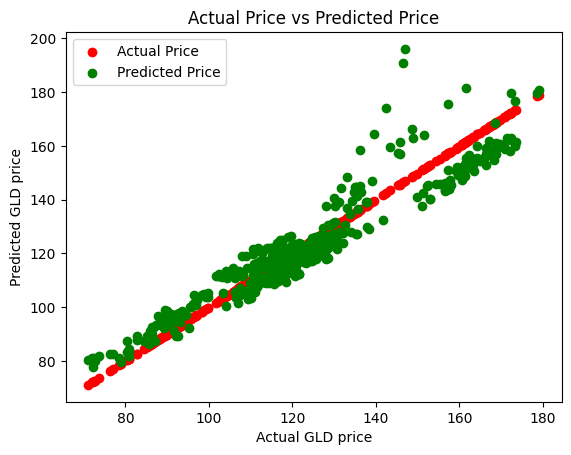

In [50]:
plt.scatter(y_test,y_test,color='red',label="Actual Price")
plt.scatter(y_test,predict,color='green',label="Predicted Price")
plt.xlabel("Actual GLD price")
plt.ylabel("Predicted GLD price")
plt.title("Actual Price vs Predicted Price")
plt.legend()
plt.show()

In [51]:
# deployment
import pickle as pkl
pkl.dump(model,open('model.pkl','wb'))